# PCA and SVD

So we have seen the effects of too many dimensions

![](http://m.memegen.com/kk2til.jpg)

First some Linear algebra review

Matrices can be thought of as transforms

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/512px-Singular-Value-Decomposition.svg.png)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Set up some data and look at it a little.

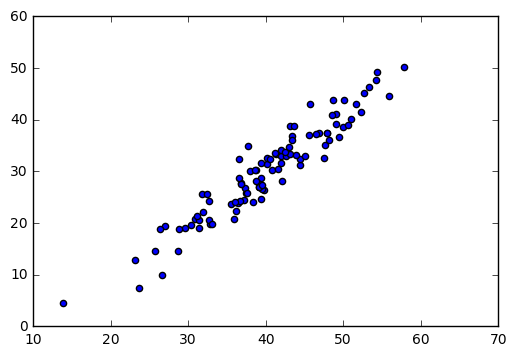

In [69]:
x1 = np.random.normal(loc=40, scale=8, size=100)
x2 = x1 - 10 + np.random.normal(scale=3, size=100)
plt.scatter(x1, x2)

In [30]:
X = np.column_stack((x1, x2))
X.shape

(100, 2)

In [31]:
X.mean(axis=0)

array([ 40.16468038,  30.2204386 ])

In [32]:
X_centered = X - X.mean(axis=0)

In [33]:
np.cov(X, rowvar=0)

array([[ 69.58031626,  69.6192905 ],
       [ 69.6192905 ,  79.25533729]])

In [34]:
np.cov(X_centered, rowvar=0)

array([[ 69.58031626,  69.6192905 ],
       [ 69.6192905 ,  79.25533729]])

In [35]:
np.dot(X.T, X)

array([[ 168208.60627562,  128271.73547894],
       [ 128271.73547894,   99173.769313  ]])

In [36]:
np.dot(X_centered.T, X_centered)

array([[ 6888.45130956,  6892.30975913],
       [ 6892.30975913,  7846.27839179]])

In [37]:
np.dot(X_centered.T, X_centered)/99 # unimportant scaling

array([[ 69.58031626,  69.6192905 ],
       [ 69.6192905 ,  79.25533729]])

### PCA

We have data in $X$.

$C$ is the covariance matrix of $X$.

The eigenvalue decomposition of $C$ is:

$Q \Lambda Q^T = C$

Where the columns of $Q$ are eigenvectors $v$ and the diagonal elements of $\Lambda$ are eigenvalues $\lambda$.

$C v = \lambda v$

The eigenvalues $\lambda$ represent the amount of variance explained by the dimension represented by their eigenvector $v$.

In [71]:
eig_vals, Q = np.linalg.eig(np.cov(X_centered, rowvar=0)*99)
np.diag(eig_vals)

array([[   458.43642467,      0.        ],
       [     0.        ,  14276.29327668]])

In [39]:
np.dot(Q, np.dot(np.diag(eig_vals), Q.T))

array([[ 6888.45130956,  6892.30975913],
       [ 6892.30975913,  7846.27839179]])

In [40]:
np.cov(X_centered, rowvar=0)*99

array([[ 6888.45130956,  6892.30975913],
       [ 6892.30975913,  7846.27839179]])

In [73]:
ordered = sorted(zip(eig_vals, Q.T), reverse=True)
eig_vals = np.array([_[0] for _ in ordered])
Q = np.column_stack((_[1] for _ in ordered))

np.diag(eig_vals)
Q

array([[-0.68215905, -0.73120382],
       [-0.73120382,  0.68215905]])

In [42]:
X_transformed = np.dot(Q[:, 0].reshape(2, 1).T, X_centered.T)

In [43]:
X_transformed[:, :5]

array([[-13.72074111,  -6.45014656, -10.76935544, -12.80792234,
          1.53897012]])

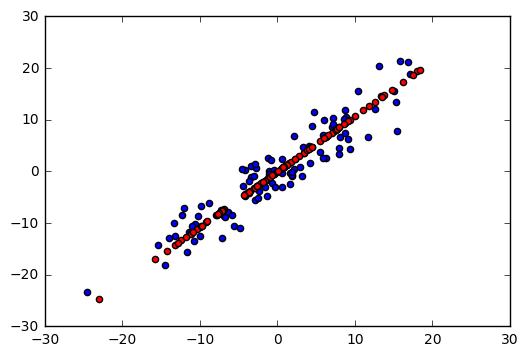

In [44]:
X_reconstituted = np.dot(X_transformed.reshape(100, 1),
                         Q[:, 0].reshape(1, 2))

plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.scatter(X_reconstituted[:, 0], X_reconstituted[:, 1], c='r')

### SVD

We have data in $X$.

The singular value decomposition of $X$ is:

$U \Sigma V^T = X$

Where the columns of $U$ and $V$ are the left and right singular vectors of $X$ and the diagonal elements of $\Sigma$ are the singular values of $X$, also the square roots of the eigenvalues of $X^TX$.

In [75]:
U, singular_vals, V_T = np.linalg.svd(X_centered)
Sigma = np.zeros((100, 2))
Sigma[:2, :2] = np.diag(singular_vals)
Sigma

array([[ 119.48344353,    0.        ],
       [   0.        ,   21.41112852],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,    0.        ],
       [   0.        ,   

In [46]:
np.dot(U, np.dot(Sigma, V_T))[:5, :]

array([[  8.87562944,  10.48428622],
       [  5.44652173,   3.74006862],
       [  9.11228706,   6.22716433],
       [ 11.65007651,   6.64755444],
       [ -3.36824963,   1.03762018]])

In [47]:
X_centered[:5, :]

array([[  8.87562944,  10.48428622],
       [  5.44652173,   3.74006862],
       [  9.11228706,   6.22716433],
       [ 11.65007651,   6.64755444],
       [ -3.36824963,   1.03762018]])

In [48]:
singular_vals**2

array([ 14276.29327668,    458.43642467])

In [49]:
eig_vals

array([ 14276.29327668,    458.43642467])

In [50]:
np.dot(U[:,0].reshape(100, 1), Sigma[0, 0])[:5]

array([[-13.72074111],
       [ -6.45014656],
       [-10.76935544],
       [-12.80792234],
       [  1.53897012]])

In [51]:
X_transformed[0][:5].reshape(5, 1)

array([[-13.72074111],
       [ -6.45014656],
       [-10.76935544],
       [-12.80792234],
       [  1.53897012]])

In [52]:
np.dot(U[:,0].reshape(100, 1), Sigma[0, 0]).dot(V_T[0, :].reshape(1, 2))[:5, :]

array([[  9.35972771,  10.03265837],
       [  4.40002584,   4.71637183],
       [  7.34641327,   7.87459388],
       [  8.73704012,   9.36520179],
       [ -1.04982239,  -1.12530084]])

In [53]:
X_reconstituted[:5, :]

array([[  9.35972771,  10.03265837],
       [  4.40002584,   4.71637183],
       [  7.34641327,   7.87459388],
       [  8.73704012,   9.36520179],
       [ -1.04982239,  -1.12530084]])

[TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) is the Sklearn implimentation of this. But if you dive into the code we will find its just a wrapper around something called [randomized_svd](https://github.com/scikit-learn/scikit-learn/blob/412996f/sklearn/decomposition/truncated_svd.py#L25)

This is a much faster solver for large matrices

In [76]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(X_centered, 2, n_iter=10,
                                          random_state=42)

In [78]:
Sigma

array([ 119.48344353,   21.4073771 ])

And there's also value in U and V themselves.

U represents the 'left' eigenvectors

V represents the 'right' eigenvectors

SVD has many different applications, each with a different interpretation

$\Sigma$ will be a diagonal matrix of eigen values, arranged from most important to least important.

If we set the lower importance ones to zero, we are effectively cutting out the least important data from $U$ and $V$

If this is done on image data you get image compression, when you reconstruct $X$ from the now smaller $U$ and $V$ 

![](http://fourier.eng.hmc.edu/e161/lectures/svdcompression_files/Fig_1.png)

### PCA is just SVD applied to feature vectors